<a href="https://colab.research.google.com/github/Onestringlab/itds/blob/main/ITDS_WC_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. kelompokkan data berdasarkan tipe tournament world cup (fifa world cup)
2. analisa dan cari tahu 3 negara yg mencetak gol terbanyak pada piala dunia 2022
3. visualisasikan total perolehan gol tiap negara pada piala dunia 2022
4. tentukan sendiri apa yg mau dianalisasikan dr dataset ini
5. tentukan sendiri apa yg mau dianalisasikan dr dataset ini


file laporan berisi:
- penjelasan dari data set yg digunakan
- analisakan temuan Anda
- metode/teknik yg Anda gunakan
- kesimpulan dr data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/BINJKT/Datascience/WC2022

/content/drive/MyDrive/BINJKT/Datascience/WC2022


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('WC_1872_2022.csv')

In [ ]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
 6   city        44353 non-null  object
 7   country     44353 non-null  object
 8   neutral     44353 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


#1. kelompokkan data berdasarkan tipe tournament world cup (fifa world cup)

In [ ]:
df_fifa_world_cup = df.loc[(df['tournament']=='FIFA World Cup')]
df_fifa_world_cup.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


#2. analisa dan cari tahu 3 negara yg mencetak gol terbanyak pada piala dunia 2022

In [ ]:
df_wc2022 = df.loc[(df['date'] > '2022-11-01') & (df['tournament']=='FIFA World Cup')]

In [ ]:
df_wc2022 = df_wc2022.drop('neutral', axis=1)

In [ ]:
df_wc2022.loc[(df_wc2022['home_team'] == 'England') | (df_wc2022['away_team'] == 'England')]

,date,home_team,away_team,home_score,away_score,tournament,city,country
44285,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar
44302,2022-11-25,England,United States,0,0,FIFA World Cup,Al Khor,Qatar
44317,2022-11-29,Wales,England,0,3,FIFA World Cup,Al Rayyan,Qatar
44334,2022-12-04,England,Senegal,3,0,FIFA World Cup,Al Khor,Qatar
44343,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar


In [ ]:
df_wc2022_home = df_wc2022[['home_team','home_score']]
df_wc2022_home = df_wc2022_home.groupby('home_team',as_index=False).sum()
df_wc2022_home.rename(columns = {'home_team':'country'}, inplace = True)
df_wc2022_home.head()

,country,home_score
0,Argentina,11
1,Australia,1
2,Belgium,1
3,Brazil,7
4,Cameroon,4


In [ ]:
df_wc2022_away = df_wc2022[['away_team','away_score']]
df_wc2022_away = df_wc2022_away.groupby('away_team',as_index=False).sum()
df_wc2022_away.rename(columns = {'away_team':'country'}, inplace = True)
df_wc2022_away.head()

,country,away_score
0,Argentina,4
1,Australia,3
2,Belgium,0
3,Brazil,1
4,Cameroon,0


In [ ]:
df_wc2022_goal = pd.merge(df_wc2022_home, df_wc2022_away, on = 'country', how='left')
df_wc2022_goal.head()

,country,home_score,away_score
0,Argentina,11,4.0
1,Australia,1,3.0
2,Belgium,1,0.0
3,Brazil,7,1.0
4,Cameroon,4,0.0


In [ ]:
df_wc2022_goal['away_score'] = df_wc2022_goal['away_score'].fillna(0)
df_wc2022_goal.head()

,country,home_score,away_score
0,Argentina,11,4.0
1,Australia,1,3.0
2,Belgium,1,0.0
3,Brazil,7,1.0
4,Cameroon,4,0.0


In [ ]:
df_wc2022_goal['away_score'] = df_wc2022_goal['away_score'].astype(int)
df_wc2022_goal.head()

,country,home_score,away_score
0,Argentina,11,4
1,Australia,1,3
2,Belgium,1,0
3,Brazil,7,1
4,Cameroon,4,0


In [ ]:
df_wc2022_goal['total'] = df_wc2022_goal['home_score'] + df_wc2022_goal['away_score']
df_wc2022_goal.head()

,country,home_score,away_score,total
0,Argentina,11,4,15
1,Australia,1,3,4
2,Belgium,1,0,1
3,Brazil,7,1,8
4,Cameroon,4,0,4


In [ ]:
df_wc2022_goal.sort_values("total",ascending=False,inplace=True)
df_wc2022_goal.head()

,country,home_score,away_score,total
11,France,11,5,16
0,Argentina,11,4,15
10,England,10,3,13
20,Portugal,11,1,12
18,Netherlands,6,4,10


# 3. visualisasikan total perolehan gol tiap negara pada piala dunia 2022

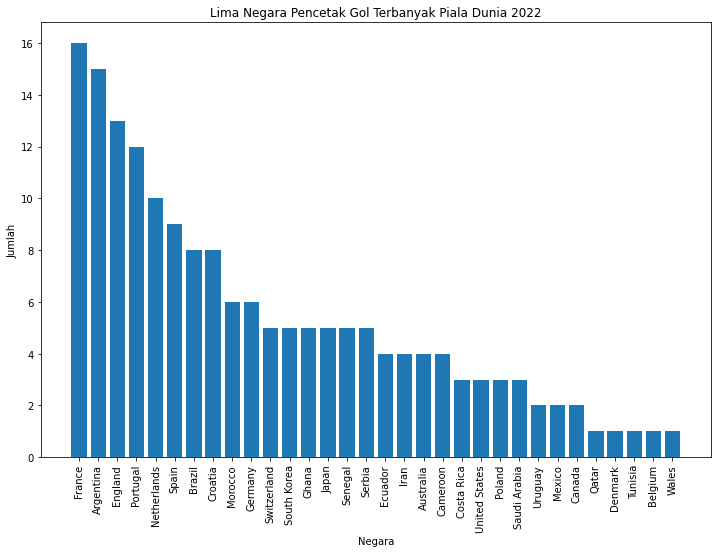

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.bar(df_wc2022_goal['country'],df_wc2022_goal['total'])
plt.xticks(rotation=90)
plt.ylabel('Jumlah')
plt.xlabel('Negara')
plt.title('Lima Negara Pencetak Gol Terbanyak Piala Dunia 2022')
plt.show()

#4.  Analisa dan cari tahu berapa kali setiap negara bertanding pada piala dunia

In [ ]:
df_wc_match = df_fifa_world_cup.assign(match = 1)
df_wc_match.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1


In [ ]:
df_wc_match_home = df_wc_match[['home_team','match']]
df_wc_match_home = df_wc_match_home.groupby('home_team',as_index=False).sum()
df_wc_match_home.rename(columns = {'home_team':'country','match':'home_match'}, inplace = True)
df_wc_match_home.head()

,country,home_match
0,Algeria,6
1,Angola,1
2,Argentina,65
3,Australia,7
4,Austria,20


In [ ]:
df_wc_match_away = df_wc_match[['away_team','match']]
df_wc_match_away = df_wc_match_away.groupby('away_team',as_index=False).sum()
df_wc_match_away.rename(columns = {'away_team':'country','match':'away_match'}, inplace = True)
df_wc_match_away.head()

,country,away_match
0,Algeria,7
1,Angola,2
2,Argentina,23
3,Australia,13
4,Austria,9


In [ ]:
df_wc_match = pd.merge(df_wc_match_home, df_wc_match_away, on = 'country', how='left')
df_wc_match.head()

,country,home_match,away_match
0,Algeria,6,7.0
1,Angola,1,2.0
2,Argentina,65,23.0
3,Australia,7,13.0
4,Austria,20,9.0


In [ ]:
df_wc_match['away_match'] = df_wc_match['away_match'].fillna(0)
df_wc_match.head()

,country,home_match,away_match
0,Algeria,6,7.0
1,Angola,1,2.0
2,Argentina,65,23.0
3,Australia,7,13.0
4,Austria,20,9.0


In [ ]:
df_wc_match['away_match'] = df_wc_match['away_match'].astype(int)
df_wc_match.head()

,country,home_match,away_match
0,Algeria,6,7
1,Angola,1,2
2,Argentina,65,23
3,Australia,7,13
4,Austria,20,9


In [ ]:
df_wc_match['total'] = df_wc_match['home_match'] + df_wc_match['away_match']
df_wc_match.head(20)

,country,home_match,away_match,total
0,Algeria,6,7,13
1,Angola,1,2,3
2,Argentina,65,23,88
3,Australia,7,13,20
4,Austria,20,9,29
5,Belgium,28,23,51
6,Bolivia,4,2,6
7,Bosnia and Herzegovina,1,2,3
8,Brazil,87,27,114
9,Bulgaria,13,13,26


In [ ]:
df_wc_match.sort_values("total",ascending=False,inplace=True)
df_wc_match.head()

,country,home_match,away_match,total
8,Brazil,87,27,114
28,Germany,78,34,112
2,Argentina,65,23,88
38,Italy,49,34,83
25,England,40,34,74


In [ ]:
df_wc_match_30 = df_wc_match.head(30)
df_wc_match_30

,country,home_match,away_match,total
8,Brazil,87,27,114
28,Germany,78,34,112
2,Argentina,65,23,88
38,Italy,49,34,83
25,England,40,34,74
26,France,44,29,73
67,Spain,32,35,67
42,Mexico,27,33,60
77,Uruguay,20,39,59
44,Netherlands,30,25,55


#5. visualisasikan total jumlah pertandingan 30 negara pada piala dunia

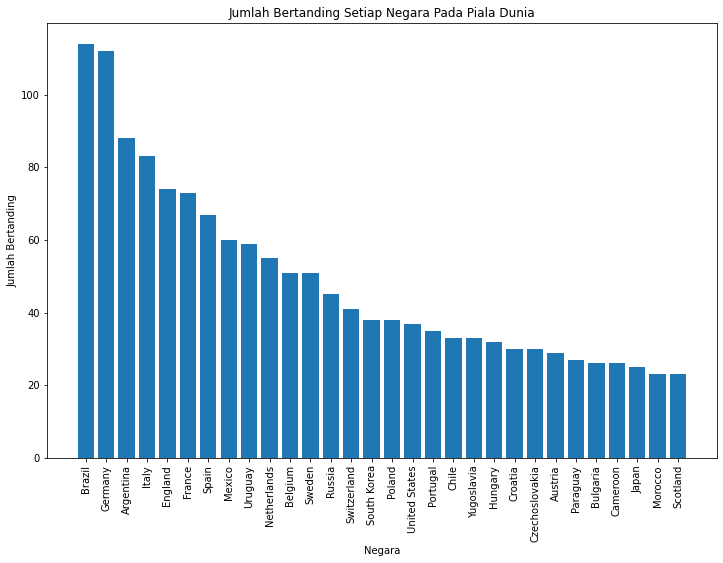

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.bar(df_wc_match_30['country'],df_wc_match_30['total'])
plt.xticks(rotation=90)
plt.ylabel('Jumlah Bertanding')
plt.xlabel('Negara')
plt.title('Jumlah Bertanding Setiap 30 Negara Pada Piala Dunia')
plt.show()

#6. Negara penyelenggara piala dunia

In [ ]:
df_fifa_world_cup.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930


In [ ]:
df_fifa_world_cup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 1311 to 44352
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        964 non-null    datetime64[ns]
 1   home_team   964 non-null    object        
 2   away_team   964 non-null    object        
 3   home_score  964 non-null    int64         
 4   away_score  964 non-null    int64         
 5   tournament  964 non-null    object        
 6   city        964 non-null    object        
 7   country     964 non-null    object        
 8   neutral     964 non-null    bool          
 9   year        964 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 108.5+ KB


In [ ]:
df_fifa_world_cup['date'] = pd.to_datetime(df_fifa_world_cup['date'])

In [ ]:
df_fifa_world_cup.date.dt.year

1311     1930
1312     1930
1313     1930
1314     1930
1315     1930
         ... 
44343    2022
44345    2022
44346    2022
44350    2022
44352    2022
Name: date, Length: 964, dtype: int64

In [ ]:
df_fifa_world_cup['year'] = df_fifa_world_cup.date.dt.year

In [ ]:
df_fifa_world_cup_country = df_fifa_world_cup[['year','country']]
df_fifa_world_cup_country.head()

,year,country
1311,1930,Uruguay
1312,1930,Uruguay
1313,1930,Uruguay
1314,1930,Uruguay
1315,1930,Uruguay


In [ ]:
df_fifa_world_cup_country = df_fifa_world_cup_country.drop_duplicates()
df_fifa_world_cup_country.head()

,year,country
1311,1930,Uruguay
1688,1934,Italy
2100,1938,France
3128,1950,Brazil
3661,1954,Switzerland


In [ ]:
df_fifa_world_cup_country

,year,country
1311,1930,Uruguay
1688,1934,Italy
2100,1938,France
3128,1950,Brazil
3661,1954,Switzerland
4369,1958,Sweden
5133,1962,Chile
6248,1966,England
7558,1970,Mexico
9197,1974,Germany


In [ ]:
df_fifa_world_cup_country.groupby(['country'],as_index=False).count()

,country,year
0,Argentina,1
1,Brazil,2
2,Chile,1
3,England,1
4,France,2
5,Germany,2
6,Italy,2
7,Japan,1
8,Mexico,2
9,Qatar,1
